In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
os.getcwd()

'c:\\DS&AI\\Vimala\\Python\\step Presentation'

In [2]:

f=pd.read_csv('Facebook.csv')
a=pd.read_csv('Amazon.csv')
a1=pd.read_csv('Apple.csv')
n=pd.read_csv('Netflix.csv')
g=pd.read_csv('Google.csv')

f['company']='facebook'
a['company']='amazon'
a1['company']='apple'
n['company']='netflix'
g['company']='google'

In [3]:
df_append=f.append([a,a1,n,g])
df_append.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26566 entries, 0 to 4040
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       26566 non-null  object 
 1   Open       26565 non-null  float64
 2   High       26565 non-null  float64
 3   Low        26565 non-null  float64
 4   Close      26565 non-null  float64
 5   Adj Close  26565 non-null  float64
 6   Volume     26565 non-null  float64
 7   company    26566 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.8+ MB


In [4]:
df_append=df_append.dropna()
df_append.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
company      0
dtype: int64

In [5]:
df_append['Date']=pd.to_datetime(df_append['Date'])

In [6]:
df_append.describe()

,Open,High,Low,Close,Adj Close,Volume
count,26565.000000,26565.000000,26565.000000,26565.000000,26565.000000,2.656500e+04
mean,190.406730,192.465780,188.206288,190.428805,190.224947,1.369710e+08
std,379.619521,383.523704,375.382955,379.673774,379.764606,2.640676e+08
min,0.049665,0.049665,0.049107,0.049107,0.038743,2.856000e+05
25%,1.658571,1.700000,1.628571,1.657143,1.628571,6.040800e+06
50%,33.615002,34.279999,33.080002,33.754284,33.490002,1.856200e+07
75%,193.059998,195.300003,190.545547,193.149994,193.149994,1.615040e+08
max,3251.060059,3344.290039,3165.429932,3225.000000,3225.000000,7.421641e+09


In [7]:
df_append.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400.0,facebook
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700.0,facebook
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0,facebook
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0,facebook
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0,facebook


Volume Vs Date: <br>

Numerical and discrete variable

Volume: Total Number of shares Values bought or sold <br>
Volume can be an indicator of market strength, as rising markets on increasing volume are typically viewed as strong and healthy. <br>

Inference: <br>
We can see activity of apple is high overall<br>
Spikes mean that shares are sold or bought at high Volume<br>
Volume is independent of growth of the stock as it includes both buying and selling<br>

From the graph, other company's volume are negligible as the values are very low compared to Apple.<br>
So we need to apply any scaling methods to comapare<br>





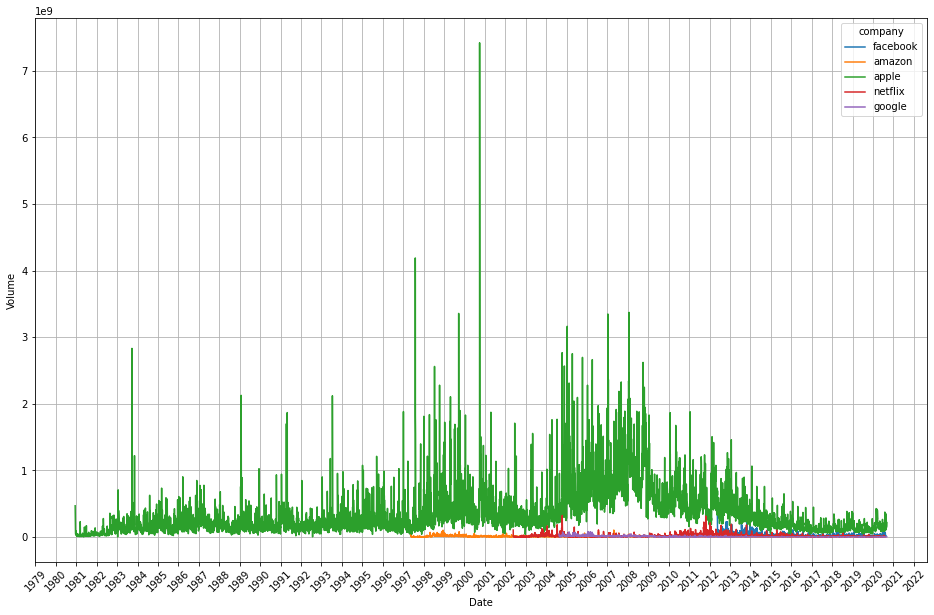

In [8]:
plt.subplots(figsize=(16,10))
sns.lineplot(data=df_append,hue='company',x='Date',y='Volume')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [9]:
df_append['Volume']= df_append['Volume'].apply(lambda x: np.log(x) if x != 0 else 0)

After Normalisation the comparision is more clear<br>

Highest: Apple <br>
Lowest:Google <br>
Eventhough Facebook is a young company, we see the volume is higher among the companies except apple. <br>
Which means it aquires a lot of public funds. <br>


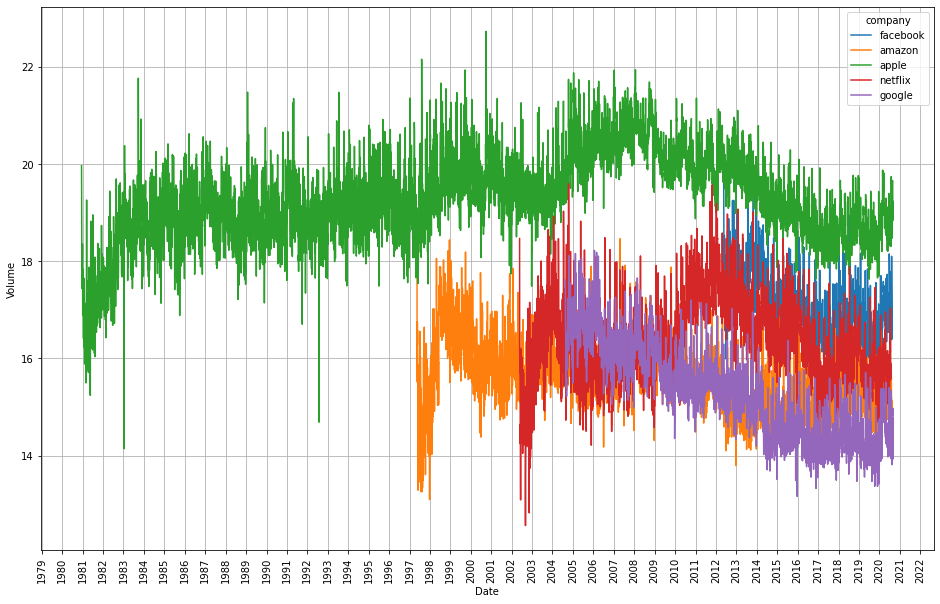

In [10]:
import matplotlib.pyplot as plt 
plt.subplots(figsize=(16,10))
sns.lineplot(data=df_append,hue='company',x='Date',y='Volume')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


    Adjacent Close: <br>

    It is the final price of the stock for the day <br>

    After the market is closed the ,share holders are paid with corporate actions like bonus or share divident 

    Share Divident:
    After the market is closed, the company usually pays to its shareholders in terms of shares so that cash balance<br> 
    of the company remains same <br>

    
    The adjacent close is calculated from the close value after the above process

    This is the usual stategy followed by most of the companies<br>


Inference: Amazon is making attempts to attract more share holders and trying to increase volume transactions
Apple: has the lowest adj close, Since the volume is already high it does not need to increase more transactions. 



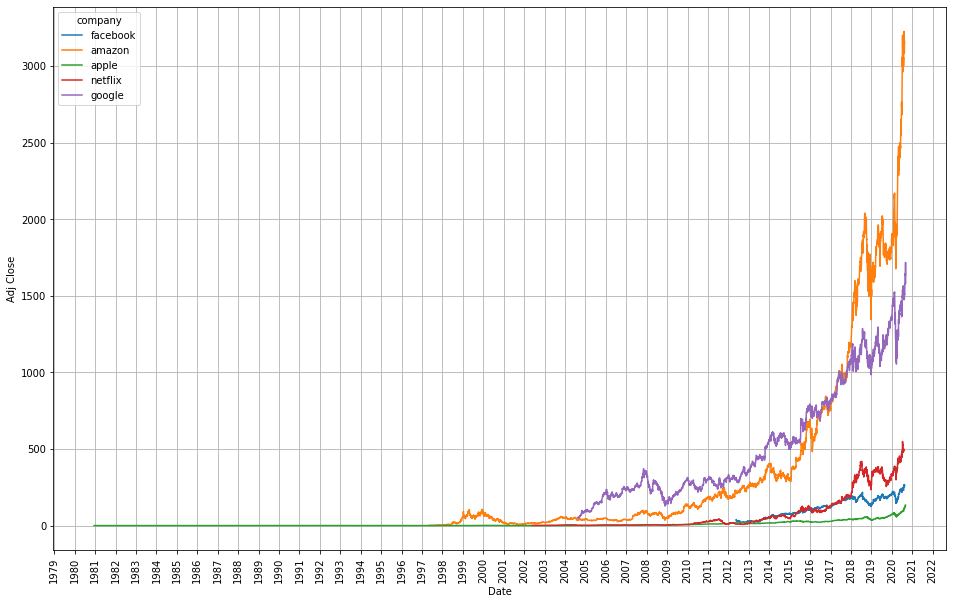

In [11]:

plt.subplots(figsize=(16,10))
sns.lineplot(data=df_append,hue='company',x='Date',y='Adj Close')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


In [12]:
df_append['percentage_Chg']=df_append['Close'].pct_change()*100
df_append.replace(np.nan,0,inplace=True)
df_append.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company,percentage_Chg
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,20.167402,facebook,0.000000
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,18.940621,facebook,-10.986139
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,18.438389,facebook,-8.903906
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,18.114156,facebook,3.225806
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,17.732266,facebook,3.218747


pct_Chg = (Price - Prev Day's Close) / Prev Day's Close * 100

<br> The net change is calculated from the previous day’s close, so you are comparing what the stock closed at today to what it closed at yesterday.
<br>we are using percetage so that there is no scaling issue during vizualisation 

Daily return:


The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.
Inference:<br>

All the companies have a overlapped distribustion on the daily return on each other 

Spikes: The share value is very volatile <br>
Thick Band: Constant performace

so, the overall performace is almost same.


In [13]:
#2006: apple
#2005 : Netflix

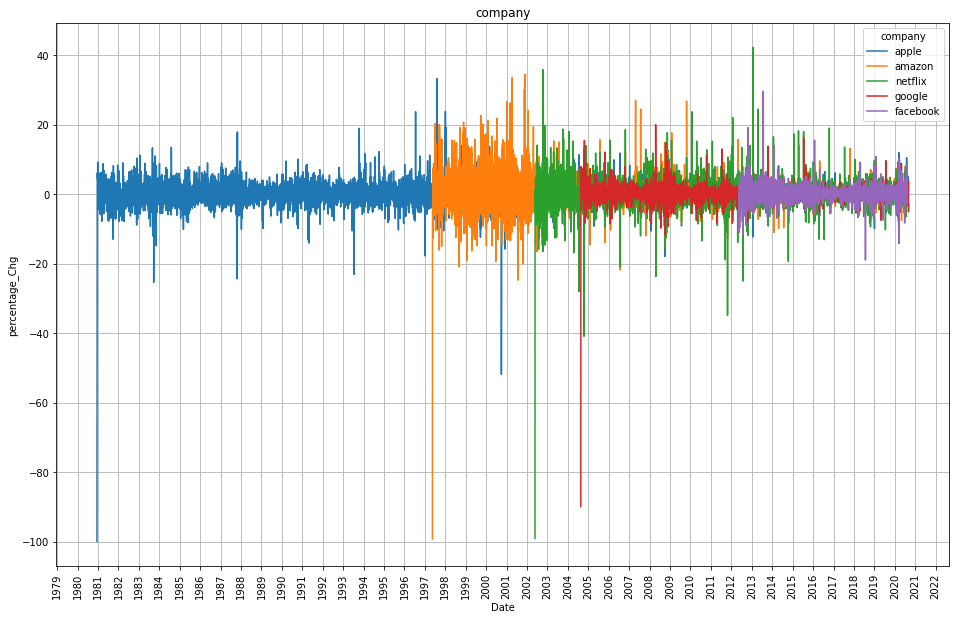

In [13]:
plt.subplots(figsize=(16,10))

sns.lineplot(data=df_append,hue='company',x='Date',y='percentage_Chg',hue_order=['apple','amazon','netflix','google','facebook'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.title(label='company')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

Open: Price of the 1st transaction of the share for the business day. Usually 9:30AM EST <br>

Below graph depicts the variations of Opening rate over the time <br>

The previous day's closing rate is mostly the next day's opening rate <br>
The open rate is subjective to many factors that come into the play like adjacent close value <br>
 <br>
<br> Opening rate in growing with an inclation depicts a healthy share value. 

<br>The value of the share is increased and therefore maximises the return of invesment

<br>Amazon: Has not sold the shares for divident/bonus
<br> Apple: The value of the share is almost constant



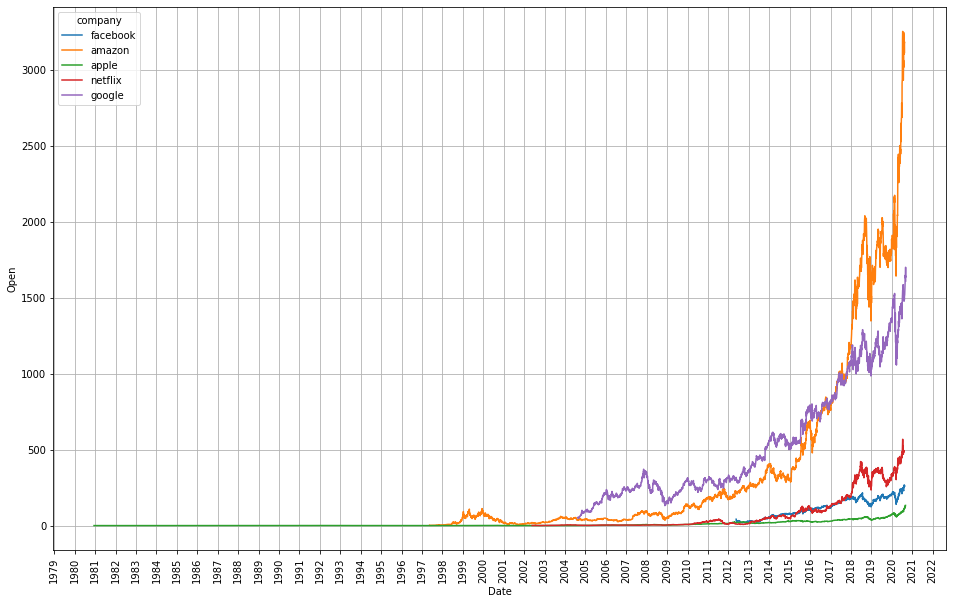

In [15]:
plt.subplots(figsize=(16,10))
sns.lineplot(data=df_append,hue='company',x='Date',y='Open')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


Close: The last Price that someone used to sell the share. Usually 4PM EST

Below graph depicts the variations of Closing rate over the time

Amzon: Has more bidders
Apple : Has least bidders


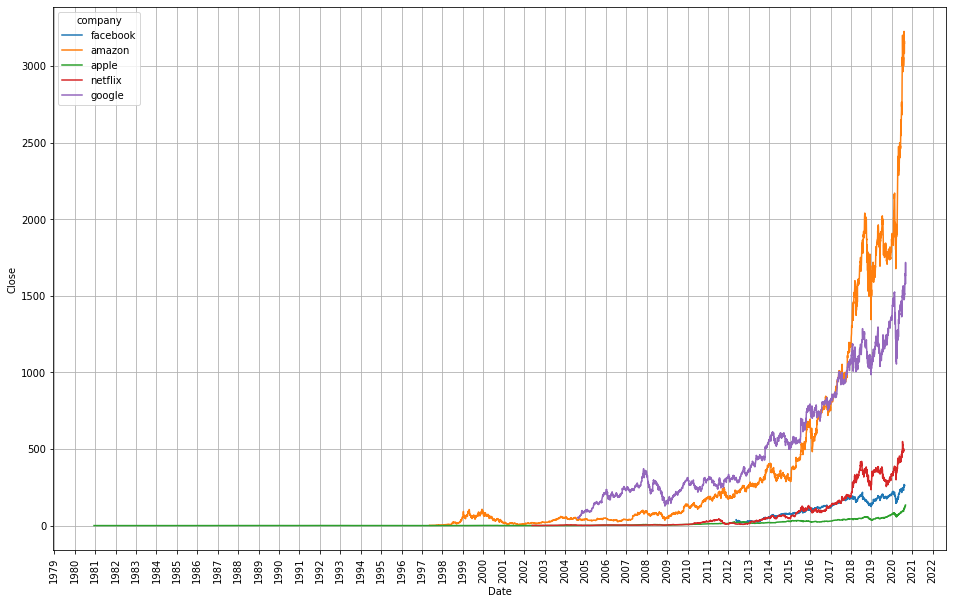

In [16]:

plt.subplots(figsize=(16,10))
sns.lineplot(data=df_append,hue='company',x='Date',y='Close')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [17]:
df_append['Diff']=df_append['Close']-df_append['Open']

Difference= Close- Open <br>
Difference rate defines the stability of the stock rate of the shares <br>
It depicts the supply and demand of the shares

Thin line: Less  corporate actionse<br>
Broad Line: more  corporate actions<br>

Apple : most healthy <br>
Facebook : Least Stable and very volatile among the 5 companies
Amzon : Many interventions like corporate actions.


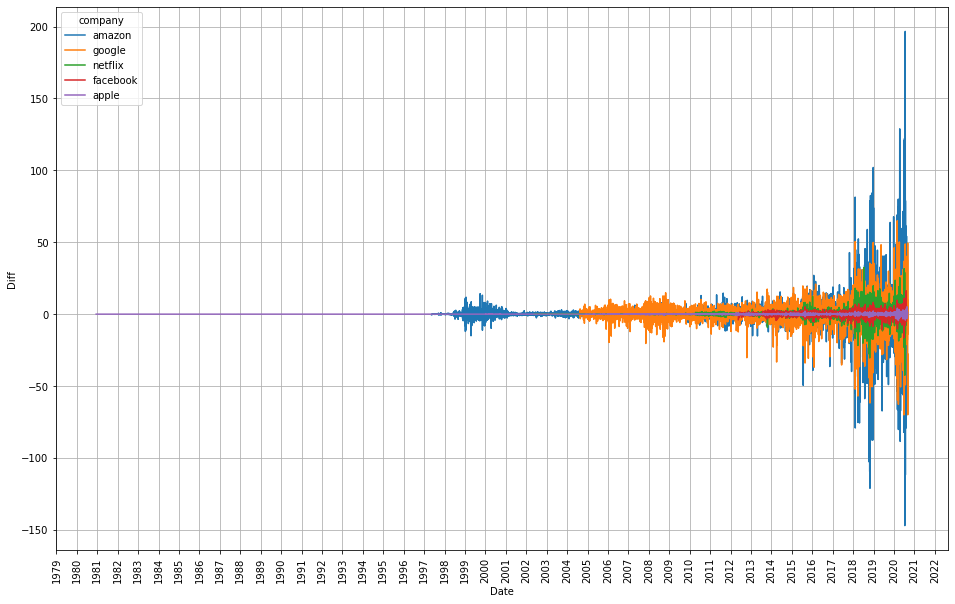

In [18]:
plt.subplots(figsize=(16,10))
sns.lineplot(data=df_append,hue='company',x='Date',y='Diff',hue_order=['amazon','google','netflix','facebook','apple'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


Conclusion:
<br>1. Apple is comparitvely not intended to increase its share value and mostly running on its own fund. Its trying to run its business safely.
<br>2. Amazon is trying to transact its shares to increase its fund. Since its adj close is higer than the most. Share holders probably gets more benifit from  corporate actions. 
<br>3. facebook: It's a risky situation to invest in facebook from the difference graph
<br>4. Google can be 2nd choice for invesment
<br>5. Netflix: It is growing company and will not be a bad choice for invesment